<a href="https://colab.research.google.com/github/AbhishekChaganti/Deep-Learning/blob/main/EX-2(sentiment%20analysis%20on%20IMDB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4916 - loss: 429.1270 - val_accuracy: 0.4951 - val_loss: 2.2056
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5051 - loss: 21.9730 - val_accuracy: 0.5010 - val_loss: 0.7217
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4994 - loss: 4.1339 - val_accuracy: 0.5034 - val_loss: 0.6979
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5027 - loss: 1.8512 - val_accuracy: 0.5004 - val_loss: 0.6955
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4961 - loss: 1.6289 - val_accuracy: 0.5010 - val_loss: 0.6939
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5044 - loss: 1.1954 - val_accuracy: 0.4986 - val_loss: 0.6938
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5127 - loss: 1.0623 - val_accuracy: 0.4993 - val_loss: 0.6934
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5030 - loss: 0.9334 - val_accuracy:

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

    Negative       0.50      0.98      0.66     12500
    Positive       0.54      0.02      0.04     12500

    accuracy                           0.50     25000
   macro avg       0.52      0.50      0.35     25000
weighted avg       0.52      0.50      0.35     25000



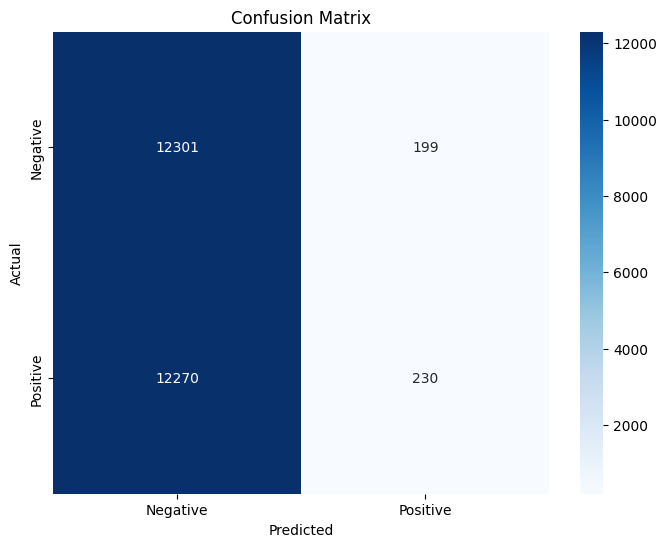

In [21]:
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()